Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

In [2]:
## If you are using the data by mounting the google drive, use the following :
#from google.colab import drive
#drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [5]:
#!ls

In [6]:
#os.chdir('gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration')  #change dir


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")
#data_dir_train = pathlib.Path("Train")
#data_dir_test = pathlib.Path('Test')

In [8]:
#!ls

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

1.   List item
2.   List item



In [32]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [33]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
1792+447

2239

In [25]:
# Create a test dataset for evaluation

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    image_size=(img_height, img_width))

Found 118 files belonging to 9 classes.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [8]:
len(class_names)

9

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

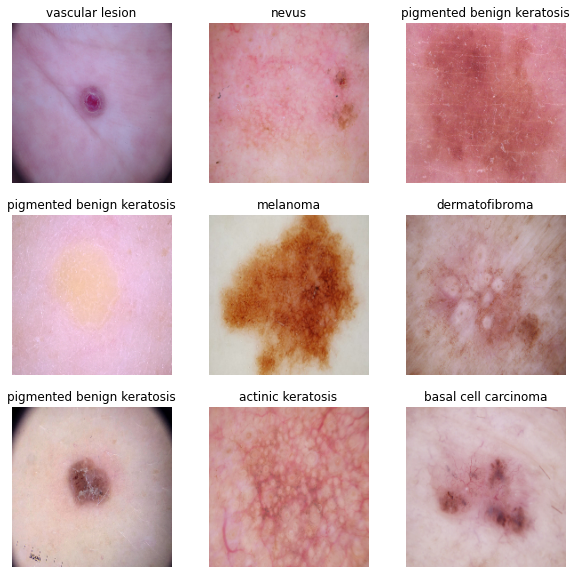

In [10]:
# Visualize few images of batch one
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
str(list(data_dir_train.glob('melanoma/*.jpg'))[0])

'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010532.jpg'

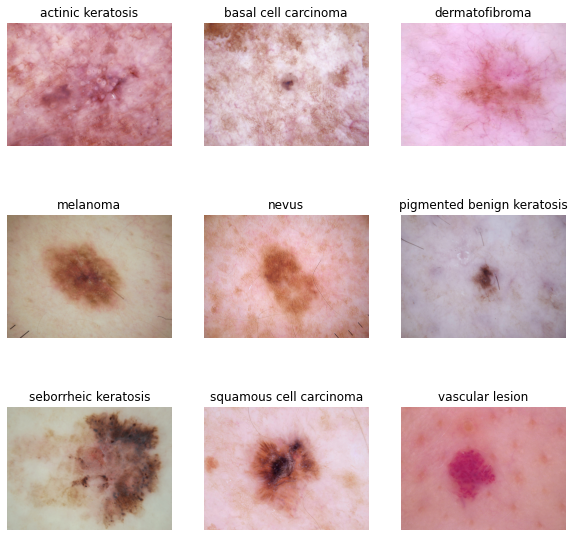

In [34]:
### your code goes here, you can use training or validation data to visualize
# Visualize images of nine classes
#import opencv as cv
from PIL import Image

plt.figure(figsize=(10,10))
for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i + 1)
    plt.title(class_names[i])
    image = Image.open(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[10]),'r')
    plt.imshow(np.asarray(image))
    plt.axis("off")



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [19]:
#AUTOTUNE = tf.data.experimental.AUTOTUNE
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
### Your code goes here

num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  
  layers.Flatten(),
  layers.Dense(512, activation='relu',kernel_regularizer=l2(0.01)),
  layers.Dense(512, activation='relu',kernel_regularizer=l2(0.01)),
  layers.Dropout(0.5),
  layers.Dense(num_classes)

])



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [17]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 180, 180, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 64)        0

### Train the model

In [19]:
epochs = 20
#epochs = 10


In [20]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 69s 1s/step - loss: 28.5951 - accuracy: 0.2337 - val_loss: 18.1750 - val_accuracy: 0.1700
Epoch 2/20
56/56 [==============================] - 24s 397ms/step - loss: 18.5380 - accuracy: 0.2678 - val_loss: 15.0508 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 24s 395ms/step - loss: 13.2450 - accuracy: 0.3473 - val_loss: 10.8000 - val_accuracy: 0.1432
Epoch 4/20
56/56 [==============================] - 24s 395ms/step - loss: 10.0063 - accuracy: 0.3796 - val_loss: 8.9303 - val_accuracy: 0.1723
Epoch 5/20
56/56 [==============================] - 24s 394ms/step - loss: 7.8404 - accuracy: 0.4194 - val_loss: 8.1138 - val_accuracy: 0.2438
Epoch 6/20
56/56 [==============================] - 24s 398ms/step - loss: 6.5319 - accuracy: 0.4924 - val_loss: 6.7069 - val_accuracy: 0.2282
Epoch 7/20
56/56 [==============================] - 24s 395ms/step - loss: 5.5986 - accuracy: 0.4948 - val_loss: 6.2415 - val_accuracy: 0.

### Visualizing training results

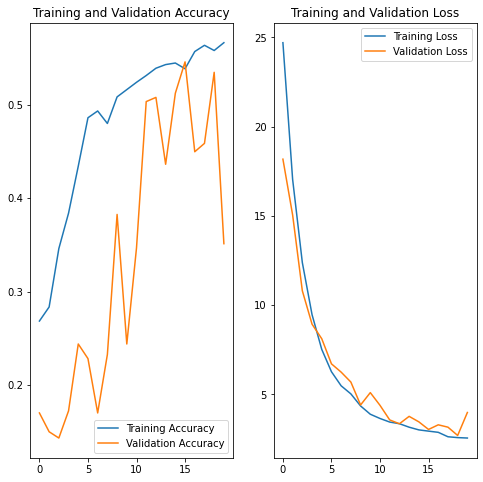

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
We have only reached till a training accuracy of approximately 57% and a validation accuracy of 35%. Since the the training accuracy is very less the model is clearly underfitting. We will use augmentation stratergies to create augmented images and build model again with same model parameters.
The validation accuracy is fluctuating very much. Also after 16 epochs the model is starting to overfit. 
The loss is reducing for both training and validation data.

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [38]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here


# Create training images generator
#Generate batches of tensor image data with real-time data augmentation.
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    fill_mode='nearest',
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    vertical_flip=True,
                    zoom_range=0.5,
                    #shear_range=0.2,
                    validation_split=0.2
                    
                    )


In [39]:
#https://keras.io/api/preprocessing/image/

#Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=data_dir_train,
                                                shuffle=True,
                                                target_size=(img_height,img_width),
                                                class_mode='sparse',
                                                seed=123,
                                                subset='training'
                                                )

Found 1795 images belonging to 9 classes.


In [40]:

# Create validation images generator
#image_gen_val = ImageDataGenerator(rescale=1./255,validation_split=0.2)
val_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                 directory=data_dir_train,
                                                 target_size=(img_height,img_width),
                                                 class_mode='sparse',
                                                 seed=123,
                                                 subset='validation')




Found 444 images belonging to 9 classes.


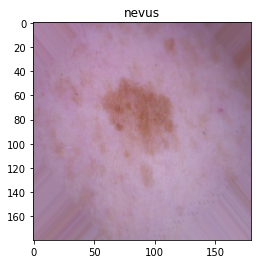

In [57]:
# Todo, visualize how your augmentation strategy works for one instance of training image
        
# Your code goes here

for _ in range(1):
    img, label = train_data_gen.next()
    #print(img.shape)
    #print(label)
    plt.imshow(img[0])
    plt.title(class_names[labels[0]])
    plt.show()


### Todo:
### Create the model, compile and train the model


In [39]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9
model = Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255, ),

  
  layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  
  layers.Flatten(),
  layers.Dense(512, activation='relu',kernel_regularizer=l2(0.01)),
  layers.Dense(512, activation='relu',kernel_regularizer=l2(0.01)),
  layers.Dropout(0.5),
  layers.Dense(num_classes)

])



### Compiling the model

In [40]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [41]:
epochs=20

In [42]:
## Your code goes here, note: train your model for 20 epochs
## your training code
history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=epochs)

Epoch 1/20
57/57 [==============================] - 104s 2s/step - loss: 27.0303 - accuracy: 0.2457 - val_loss: 18.2596 - val_accuracy: 0.1667
Epoch 2/20
57/57 [==============================] - 51s 894ms/step - loss: 17.6867 - accuracy: 0.3250 - val_loss: 13.9823 - val_accuracy: 0.1689
Epoch 3/20
57/57 [==============================] - 51s 890ms/step - loss: 12.7458 - accuracy: 0.3504 - val_loss: 10.2869 - val_accuracy: 0.2095
Epoch 4/20
57/57 [==============================] - 50s 887ms/step - loss: 9.3681 - accuracy: 0.3704 - val_loss: 7.9322 - val_accuracy: 0.1982
Epoch 5/20
57/57 [==============================] - 50s 877ms/step - loss: 7.0168 - accuracy: 0.4201 - val_loss: 6.4413 - val_accuracy: 0.2320
Epoch 6/20
57/57 [==============================] - 51s 891ms/step - loss: 5.7319 - accuracy: 0.4259 - val_loss: 5.3343 - val_accuracy: 0.2658
Epoch 7/20
57/57 [==============================] - 50s 883ms/step - loss: 4.7760 - accuracy: 0.4842 - val_loss: 5.0944 - val_accuracy: 0.

### Visualizing the results

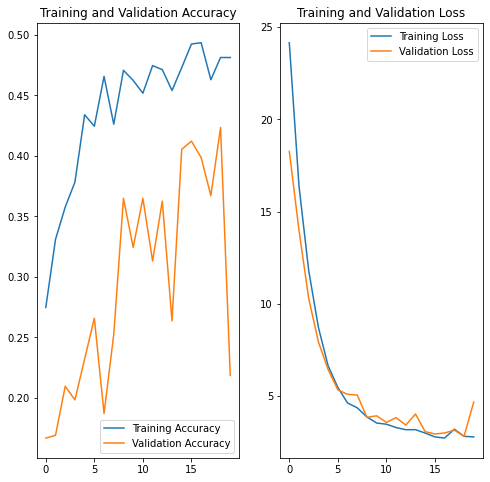

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Even after introducing data augmentation techniques, there is no improvement in the accuracy of the model. The model is underfitting as well as overfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [11]:
classes = os.listdir(data_dir_train)
classes

['nevus',
 'seborrheic keratosis',
 'actinic keratosis',
 'vascular lesion',
 'squamous cell carcinoma',
 'melanoma',
 'pigmented benign keratosis',
 'basal cell carcinoma',
 'dermatofibroma']

In [15]:
## Your code goes here.
dic = {}
for cls in classes:
    dic[cls]=len(list(data_dir_train.glob(cls+'/*jpg')))
    print(cls,dic[cls])


nevus 357
seborrheic keratosis 77
actinic keratosis 114
vascular lesion 139
squamous cell carcinoma 181
melanoma 438
pigmented benign keratosis 462
basal cell carcinoma 376
dermatofibroma 95


                            count
nevus                         357
seborrheic keratosis           77
actinic keratosis             114
vascular lesion               139
squamous cell carcinoma       181
melanoma                      438
pigmented benign keratosis    462
basal cell carcinoma          376
dermatofibroma                 95


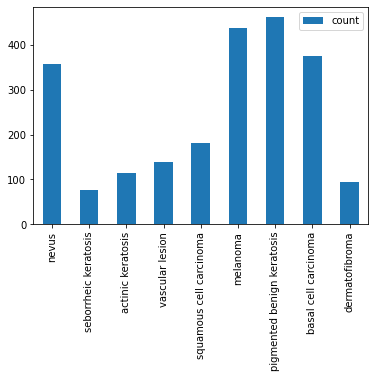

In [68]:

count_df = pd.DataFrame(data=dic.values(),index=dic.keys(),columns=['count'])
print(count_df)
count_df.plot.bar()
plt.show()

#### **Todo:** Write your findings here: 

- We have high class imbalance in the input samples provided for training. Because of which the model might not be able to produce a good accuracy.

#### - Which class has the least number of samples?

- seborrheic keratosis  and dermatofibroma have least number of samples

#### - Which classes dominate the data in terms proportionate number of samples?

- pigmented benign keratosis and melanoma dominate the data in terms of samples.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [22]:
path_to_training_dataset= str(data_dir_train)+'/'
import Augmentor


In [24]:
path_to_training_dataset

'Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

In [25]:
data_dir_train

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [29]:
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    #p.random_distortion()
    p.zoom_random(probability=0.2,percentage_area=.25)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F47AE954400>: 100%|██████████| 500/500 [00:09<00:00, 52.22 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F47AE7D0C70>: 100%|██████████| 500/500 [00:09<00:00, 52.15 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F47AE954B20>:   0%|          | 1/500 [00:00<01:10,  7.13 Samples/s]

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F47AE99CE50>: 100%|██████████| 500/500 [00:09<00:00, 52.01 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F47AE7CC5E0>: 100%|██████████| 500/500 [00:53<00:00,  9.38 Samples/s]                    
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F47AE978A30>: 100%|██████████| 500/500 [00:40<00:00, 12.38 Samples/s]                    
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F47AE7643D0>:   2%|▏         | 9/500 [00:00<01:09,  7.11 Samples/s]

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F47AEAA36A0>: 100%|██████████| 500/500 [00:09<00:00, 53.60 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F47AE99AB80>: 100%|██████████| 500/500 [00:21<00:00, 23.68 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F47AE7C7100>:   2%|▏         | 10/500 [00:00<01:17,  6.29 Samples/s]                 

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F47AE9540A0>: 100%|██████████| 500/500 [00:09<00:00, 55.36 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F47AE7C5430>:   1%|          | 3/500 [00:00<01:15,  6.58 Samples/s]                  

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F47AE976C40>: 100%|██████████| 500/500 [00:08<00:00, 56.89 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [9]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [12]:
aug_dic={}
for cls in classes:
    aug_dic[cls]=len(list(data_dir_train.glob(cls+'/output/*jpg')))
    print(cls,aug_dic[cls])

nevus 500
seborrheic keratosis 500
actinic keratosis 500
vascular lesion 500
squamous cell carcinoma 500
melanoma 500
pigmented benign keratosis 500
basal cell carcinoma 500
dermatofibroma 500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [13]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [14]:
list(data_dir_train.glob('*/output'))

[PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output')]

In [15]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [16]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [20]:
## your code goes here
num_classes = 9
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, ),

  
  layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  
  layers.Flatten(),
  layers.Dense(512, activation='relu',kernel_regularizer=l2(0.01)),
  layers.Dense(512, activation='relu',kernel_regularizer=l2(0.01)),
  layers.Dropout(0.5),
  layers.Dense(num_classes)

])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [21]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [22]:
epochs = 50
## Your code goes here, use 50 epochs.
# your model fit code
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/50
169/169 [==============================] - 55s 317ms/step - loss: 22.9344 - accuracy: 0.2248 - val_loss: 10.9787 - val_accuracy: 0.1403
Epoch 2/50
169/169 [==============================] - 54s 314ms/step - loss: 8.3528 - accuracy: 0.3274 - val_loss: 6.1531 - val_accuracy: 0.1262
Epoch 3/50
169/169 [==============================] - 54s 313ms/step - loss: 4.8031 - accuracy: 0.3689 - val_loss: 4.1125 - val_accuracy: 0.2784
Epoch 4/50
169/169 [==============================] - 54s 317ms/step - loss: 3.7659 - accuracy: 0.3711 - val_loss: 3.7840 - val_accuracy: 0.3111
Epoch 5/50
169/169 [==============================] - 54s 315ms/step - loss: 3.2045 - accuracy: 0.3974 - val_loss: 2.9915 - val_accuracy: 0.3935
Epoch 6/50
169/169 [==============================] - 54s 315ms/step - loss: 2.9431 - accuracy: 0.4056 - val_loss: 3.2136 - val_accuracy: 0.3318
Epoch 7/50
169/169 [==============================] - 54s 314ms/step - loss: 2.6597 - accuracy: 0.4182 - val_loss: 2.4011 - val_

#### **Todo:**  Visualize the model results

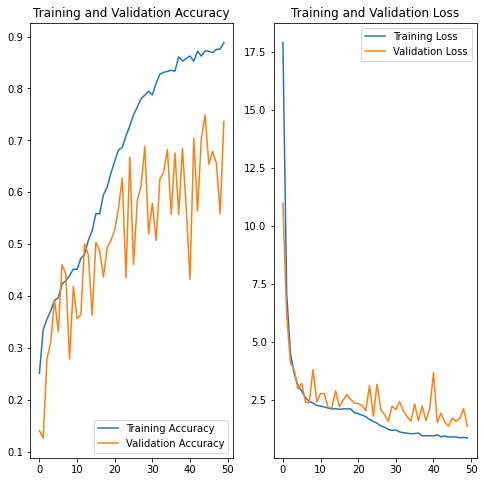

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
Training accuracy increases with the increase in number of epochs. Eventhough the validation accuracy is fluctuating heavily, there is an over all increase for validation accuracy till nearly 20 epochs. Then it is stagnating.
The loss seems to be decreasing continuously.
Classs rebalancing has clearly helped to improve accuracy. In 20 epochs the train accuracy has crossed 60%. Clearly this model is less underfit than previous models. 
Even after using dropout layers, model still overfits. Also when the traing time increases the model tend to overfit. We may need to have more number of images to have a generalisable model.

In [28]:
test_ds.batch

<bound method DatasetV2.batch of <BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>>

In [26]:
model.evaluate(test_ds)

4/4 [==============================] - 8s 174ms/step - loss: 3.6581 - accuracy: 0.3644


[3.6581411361694336, 0.3644067943096161]

In [27]:
model.metrics_names

['loss', 'accuracy']

There is only 36% accuracy for test data.